# Week 15 Lecture 1 - Regression and Residuals
This week we will review regression, residuals and regression inference

In [79]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [82]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b
    

In [95]:
heights = Table.read_table('family_heights.csv')
mid_parent = (heights.column('father') + heights.column('mother'))/2
heights = heights.with_columns('MidParent', mid_parent)
heights

family,father,mother,child,children,order,sex,MidParent
1,78.5,67,73.2,4,1,male,72.75
1,78.5,67,69.2,4,2,female,72.75
1,78.5,67,69,4,3,female,72.75
1,78.5,67,69,4,4,female,72.75
2,75.5,66.5,73.5,4,1,male,71
2,75.5,66.5,72.5,4,2,male,71
2,75.5,66.5,65.5,4,3,female,71
2,75.5,66.5,65.5,4,4,female,71
3,75,64,71,2,1,male,69.5
3,75,64,68,2,2,female,69.5


In [96]:
def residual(table, x, y):
    return table.column(y) - fit(table, x, y)

In [97]:
fitted = fit(heights, 'MidParent', 'child')
residuals = residual(heights, 'MidParent', 'child')
heights = heights.with_columns('Fitted', fitted,
                              'Residual', residuals)
heights 

family,father,mother,child,children,order,sex,MidParent,Fitted,Residual
1,78.5,67,73.2,4,1,male,72.75,70.8039,2.39613
1,78.5,67,69.2,4,2,female,72.75,70.8039,-1.60387
1,78.5,67,69,4,3,female,72.75,70.8039,-1.80387
1,78.5,67,69,4,4,female,72.75,70.8039,-1.80387
2,75.5,66.5,73.5,4,1,male,71,69.641,3.859
2,75.5,66.5,72.5,4,2,male,71,69.641,2.859
2,75.5,66.5,65.5,4,3,female,71,69.641,-4.141
2,75.5,66.5,65.5,4,4,female,71,69.641,-4.141
3,75,64,71,2,1,male,69.5,68.6443,2.35574
3,75,64,68,2,2,female,69.5,68.6443,-0.644261


In [99]:
def scatter_fit(table, x, y):
    table.scatter(x, y, s=15)
    plots.plot(table.column(x), fit(table, x, y), lw=4, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)

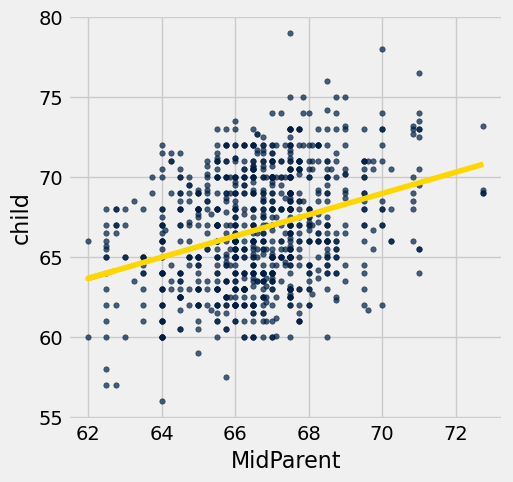

In [100]:
scatter_fit(heights, 'MidParent', 'child')

In [87]:
def residual_plot(table, x, y):
    x_array = table.column(x)
    t = Table().with_columns(
            x, x_array,
            'residuals', residual(table, x, y)
        )
    t.scatter(x, 'residuals', color='r')
    xlims = make_array(min(x_array), max(x_array))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plots.title('Residual Plot')

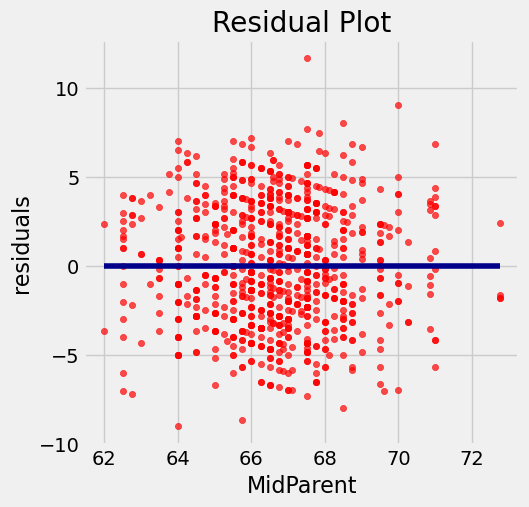

In [102]:
residual_plot(heights, 'MidParent', 'child')

# Analysis
The midparent heights are on the horizontal axis, as in the original scatter plot. But now the vertical axis shows the residuals. Notice that the plot appears to be centered around the horizontal line at the level 0 (shown in dark blue). Notice also that the plot shows no upward or downward trend. We will observe later that this lack of trend is true of all regressions.

# Regression Diagnostics
Residual plots help us make visual assessments of the quality of a linear regression analysis. Such assessments are called diagnostics. The function regression_diagnostic_plots draws the original scatter plot as well as the residual plot for ease of comparison.

In [103]:
def regression_diagnostic_plots(table, x, y):
    scatter_fit(table, x, y)
    residual_plot(table, x, y)

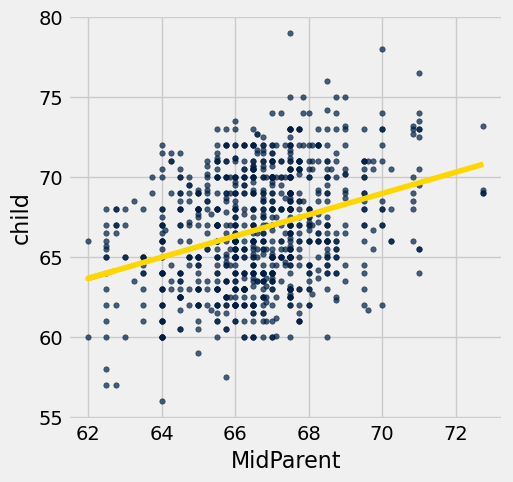

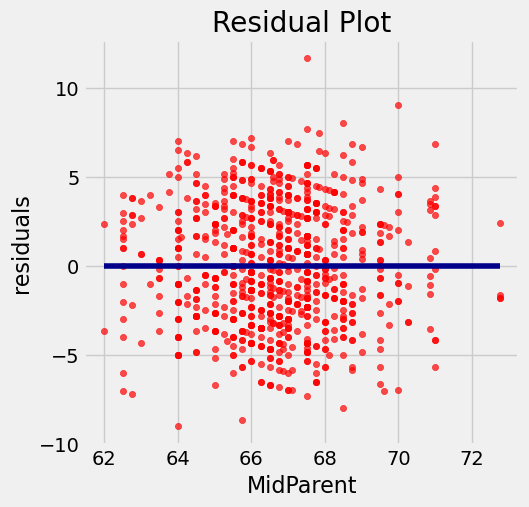

In [104]:
regression_diagnostic_plots(heights, 'MidParent', 'child')

## **The residual plot of a good regression shows no pattern. The residuals look about the same, above and below the horizontal line at 0, across the range of the predictor variable.**

# Detecting Nonlinearity
Drawing the scatter plot of the data usually gives an indication of whether the relation between the two variables is non-linear. Often, however, it is easier to spot non-linearity in a residual plot than in the original scatter plot. This is usually because of the scales of the two plots: the residual plot allows us to zoom in on the errors and hence makes it easier to spot patterns.

In [110]:
dugong = Table.read_table('dugong.csv')
dugong = dugong.move_to_start('Length')
dugong

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5
2.27,4
2.15,5
2.26,5
2.35,7
2.47,8


In [111]:
correlation(dugong, 'Length', 'Age')

0.82964745549057139

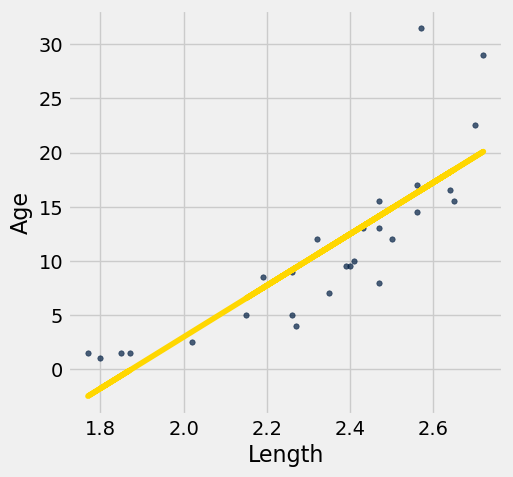

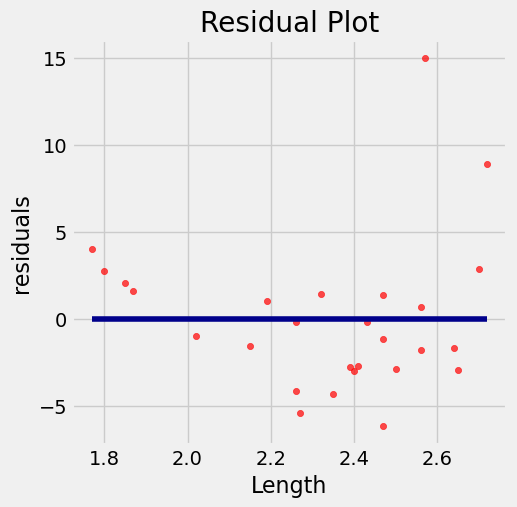

In [112]:
regression_diagnostic_plots(dugong, 'Length', 'Age')

# Analysis
At the low end of the lengths, the residuals are almost all positive; then they are almost all negative; then positive again at the high end of lengths. In other words the regression estimates have a pattern of being too high, then too low, then too high. That means it would have been better to use a curve instead of a straight line to estimate the ages.

### **When a residual plot shows a pattern, there may be a non-linear relation between the variables.**

# Detecting Heteroscedasticity
pronounced hed-uhr-oh-skuh-DASS-tick. Meaning "Uneven Spread."
Notice how the residual plot flares out towards the low end of the accelerations. In other words, the variability in the size of the errors is greater for low values of acceleration than for high values. Uneven variation is often more easily noticed in a residual plot than in the original scatter plot.

If the residual plot shows uneven variation about the horizontal line at 0, the regression estimates are not equally accurate across the range of the predictor variable.

# Numerical Diagnostics
Numerical values that show goodness of the regression line

In [113]:
correlation(heights, 'MidParent','Residual')

2.5960675436631068e-16

In [115]:
round(correlation(heights, 'MidParent','Residual'), 10)

0.0

In [116]:
dugong = dugong.with_columns(
    'Fitted Value', fit(dugong, 'Length', 'Age'),
    'Residual', residual(dugong, 'Length','Age'))

round(correlation(dugong, 'Length', 'Residual'), 10)

0.0

# Average of Residuals
**No matter what the shape of the scatter diagram, the average of the residuals is 0.**


In [117]:
round(np.mean(heights.column('Residual')), 10)

0.0

In [118]:
round(np.mean(dugong.column('Residual')), 10)

0.0

# SD of the Residuals
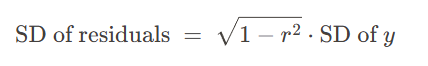

In [119]:
np.std(heights.column('Residual'))

3.3862655542854498

In [121]:
r = correlation(heights, 'MidParent', 'child')
np.sqrt(1 - r**2) * np.std(heights.column('child'))

3.3862655542854494

In [122]:
hybrid = Table.read_table('hybrid.csv')
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


In [123]:
hybrid = hybrid.with_columns(
     'fitted mpg', fit(hybrid, 'acceleration', 'mpg'),
     'residual', residual(hybrid, 'acceleration', 'mpg')
)
np.std(hybrid.column('residual')), np.sqrt(1 - r**2)*np.std(hybrid.column('mpg'))

(9.4327368334302903, 10.352470463787197)

# Another Way to Interpret r
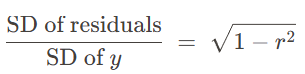
<br>
A complementary result is that no matter what the shape of the scatter plot, the SD of the fitted values is a fraction of the SD of the observed values of y. The fraction is |r∣.
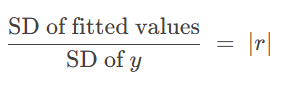



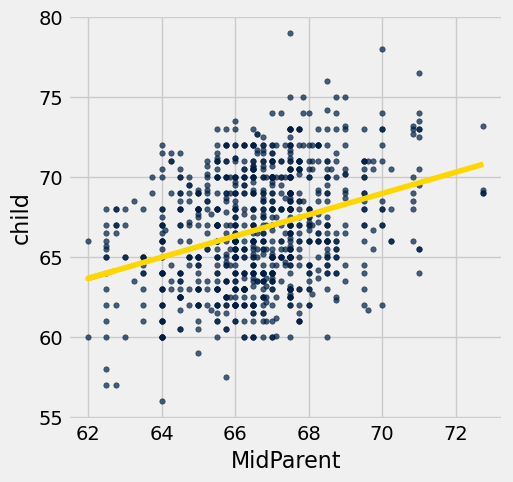

In [124]:
scatter_fit(heights, 'MidParent', 'child')

In [125]:
correlation(heights, 'MidParent', 'child')

0.32244267720033076

In [127]:
heights


family,father,mother,child,children,order,sex,MidParent,Fitted,Residual
1,78.5,67,73.2,4,1,male,72.75,70.8039,2.39613
1,78.5,67,69.2,4,2,female,72.75,70.8039,-1.60387
1,78.5,67,69,4,3,female,72.75,70.8039,-1.80387
1,78.5,67,69,4,4,female,72.75,70.8039,-1.80387
2,75.5,66.5,73.5,4,1,male,71,69.641,3.859
2,75.5,66.5,72.5,4,2,male,71,69.641,2.859
2,75.5,66.5,65.5,4,3,female,71,69.641,-4.141
2,75.5,66.5,65.5,4,4,female,71,69.641,-4.141
3,75,64,71,2,1,male,69.5,68.6443,2.35574
3,75,64,68,2,2,female,69.5,68.6443,-0.644261


In [128]:
np.std(heights.column('Fitted'))/np.std(heights.column('child'))

0.32244267720033065

In [129]:
correlation(hybrid, 'acceleration', 'mpg')

-0.5060703843771186

In [130]:
np.std(hybrid.column('fitted mpg'))/np.std(hybrid.column('mpg'))

0.5060703843771186

# Inference for Regression - A Regression Model


In [131]:
# Ignore this code; it's graphics for demonstrating the regression model
def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    errors = np.random.normal(0, 6, sample_size)
    y = (true_slope * x + true_int) + errors
    sample = Table().with_columns('x', x, 'y', y)

    sample.scatter('x', 'y')
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title('True Line, and Points Created')

    sample.scatter('x', 'y')
    plots.title('What We Get to See')

    sample.scatter('x', 'y', fit_line=True)
    plots.title('Regression Line: Estimate of True Line')

    sample.scatter('x', 'y', fit_line=True)
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title("Regression Line and True Line")

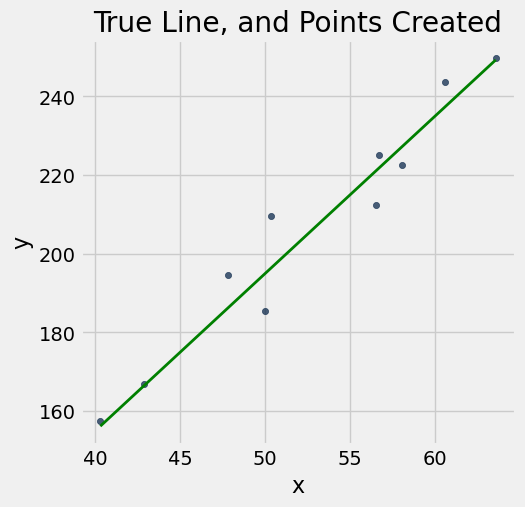

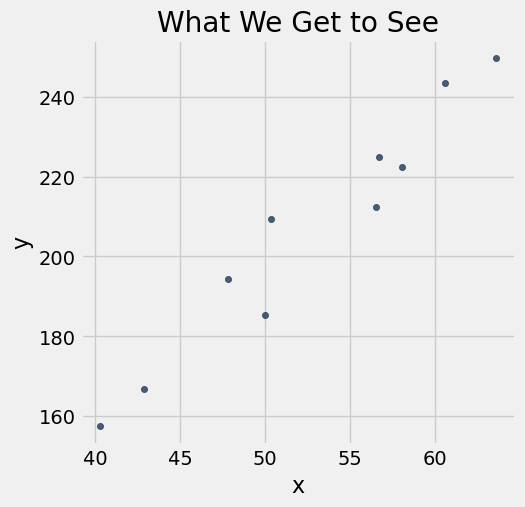

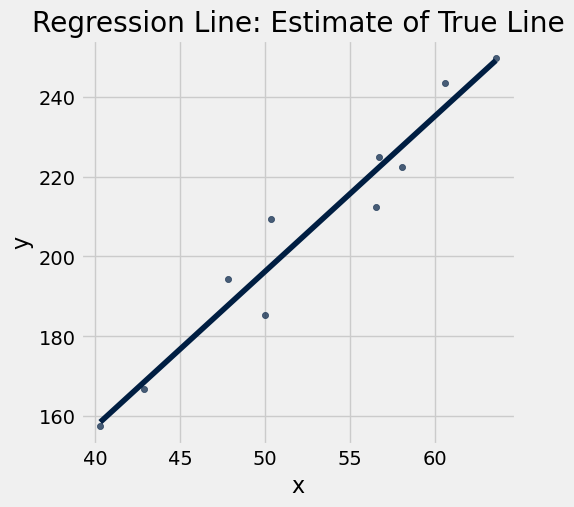

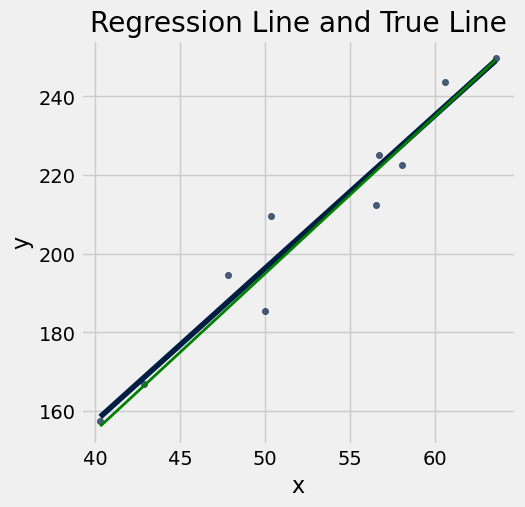

In [132]:
draw_and_compare(4, -5, 10)

### if the sample size is large, then the regression line is a good approximation to the true line.

# Inference for the True Slope

In [136]:
baby = Table.read_table('baby.csv')
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


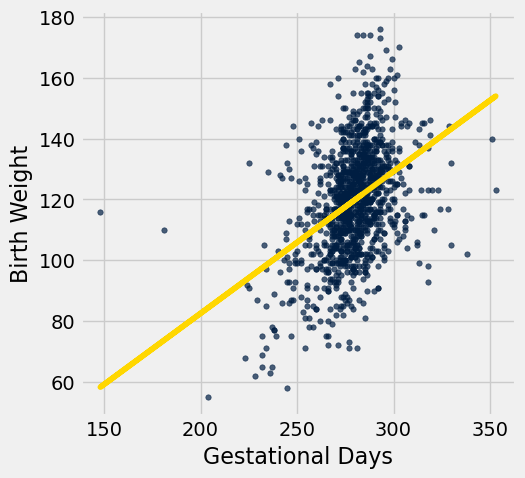

In [137]:
scatter_fit(baby, 'Gestational Days', 'Birth Weight')

In [138]:
correlation(baby, 'Gestational Days', 'Birth Weight')

0.40754279338885108

# Estimate the slope of the line

In [139]:
slope(baby, 'Gestational Days', 'Birth Weight')

0.46655687694921522

# Bootstrapping the Scatter Plot
## Estimating the True Slope


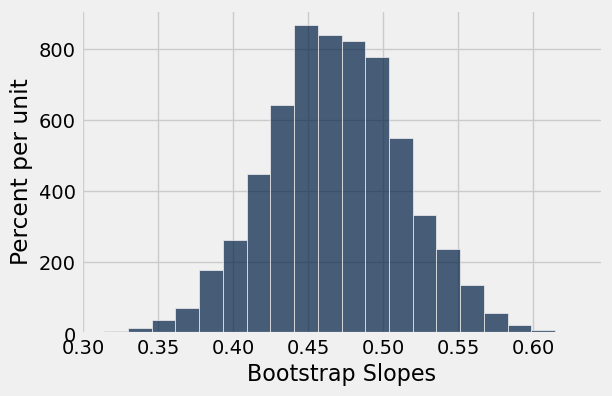

In [140]:
slopes = make_array()
for i in np.arange(5000):
    bootstrap_sample = baby.sample()
    bootstrap_slope = slope(bootstrap_sample, 'Gestational Days', 'Birth Weight')
    slopes = np.append(slopes, bootstrap_slope)
Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)

In [141]:
# 95 % confidence
left = percentile(2.5, slopes)
right = percentile(97.5, slopes)
left, right

(0.38057883583543806, 0.55893813106160217)

In [142]:
def bootstrap_slope(table, x, y, repetitions):
    
    # For each repetition:
    # Bootstrap the scatter, get the slope of the regression line,
    # augment the list of generated slopes
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = table.sample()
        bootstrap_slope = slope(bootstrap_sample, x, y)
        slopes = np.append(slopes, bootstrap_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(table, x, y)
    
    # Display results
    Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)
    plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Slope of regression line:', observed_slope)
    print('Approximate 95%-confidence interval for the true slope:')
    print(left, right)

Slope of regression line: 0.466556876949
Approximate 95%-confidence interval for the true slope:
0.380104625053 0.559346223158


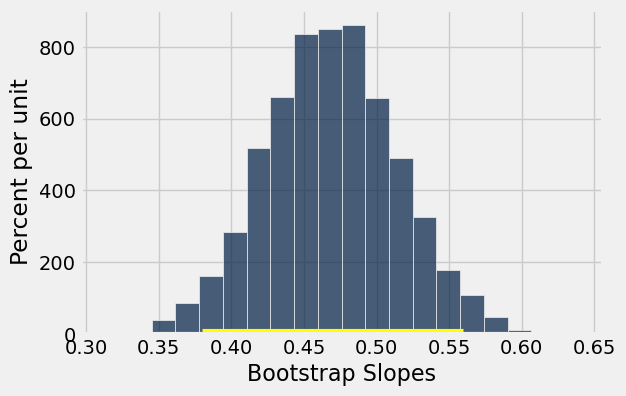

In [143]:
bootstrap_slope(baby, 'Gestational Days', 'Birth Weight', 5000)

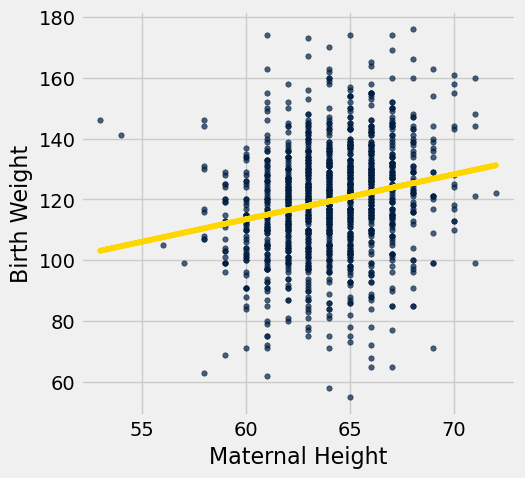

In [144]:
scatter_fit(baby, 'Maternal Height', 'Birth Weight')

In [145]:
correlation(baby, 'Maternal Height', 'Birth Weight')

0.20370417718968034

Slope of regression line: 1.47801935193
Approximate 95%-confidence interval for the true slope:
1.03515252255 1.91104976971


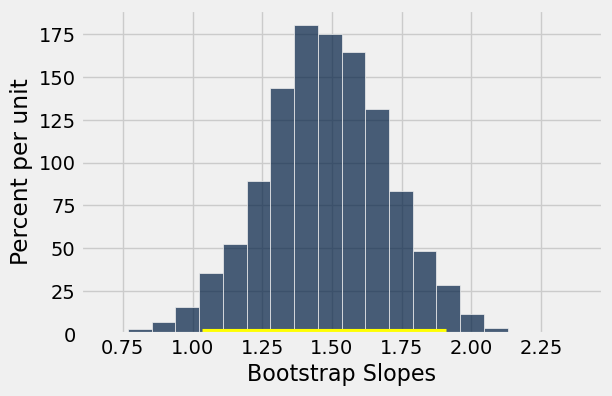

In [146]:
bootstrap_slope(baby, 'Maternal Height', 'Birth Weight', 5000)

# Could the True Slope Be 0?
Suppose we believe that our data follow the regression model, and we fit the regression line to estimate the true line. If the regression line isn’t perfectly flat, as is almost invariably the case, we will be observing some linear association in the scatter plot.

But what if that observation are not linear relation between the two variables?

Here is a simulation that illustrates why this question arises. We will once again call the function draw_and_compare, this time requiring the true line to have slope 0. Our goal is to see whether our regression line shows a slope that is not 0.

Remember that the arguments to the function draw_and_compare are the slope and the intercept of the true line, and the number of points to be generated.

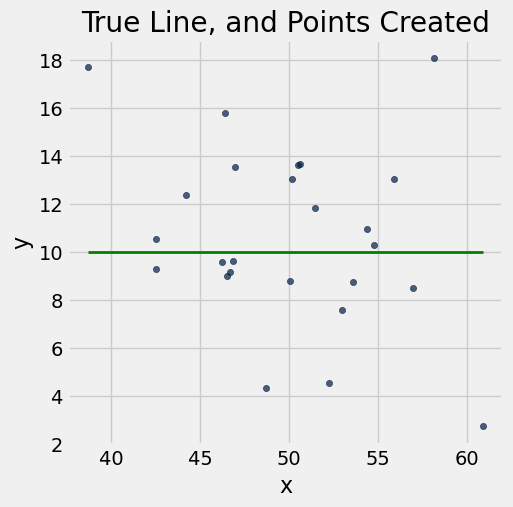

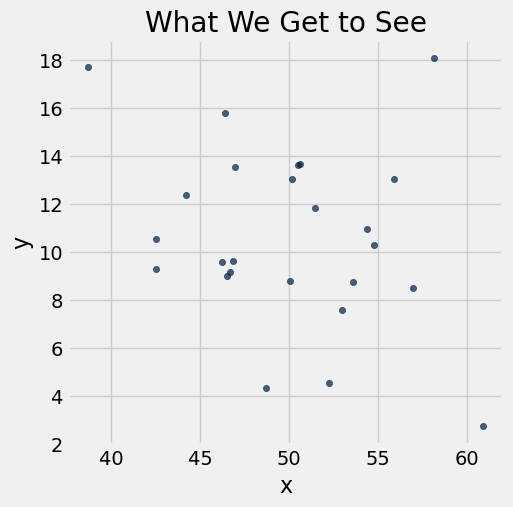

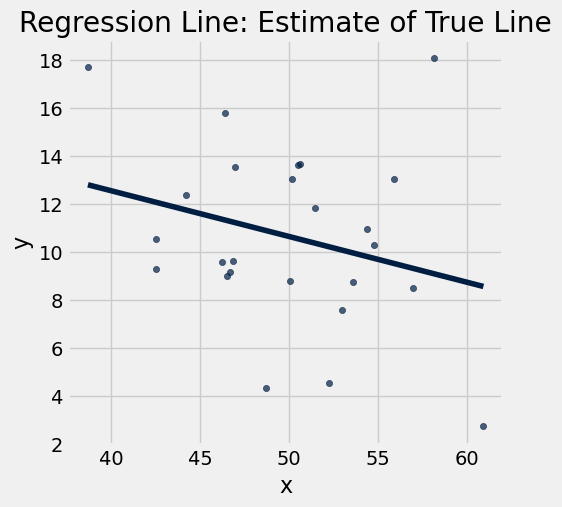

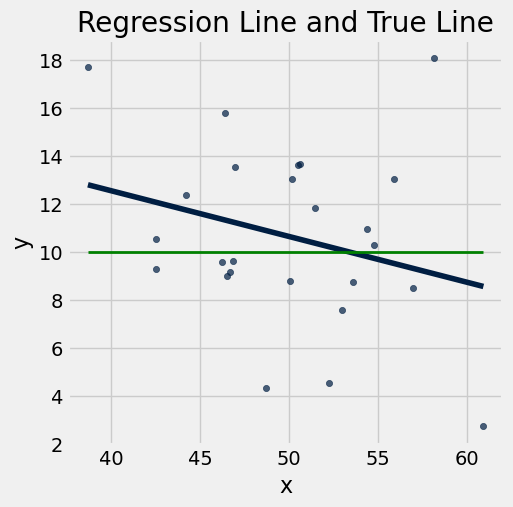

In [147]:
draw_and_compare(0, 10, 25)

## Null Hypothesis: The slope of the true line is 0.
## Alternative Hypothesis. The slope of the true line is not 0.

In [148]:
slope(baby, 'Maternal Age', 'Birth Weight')

0.085007669415825132

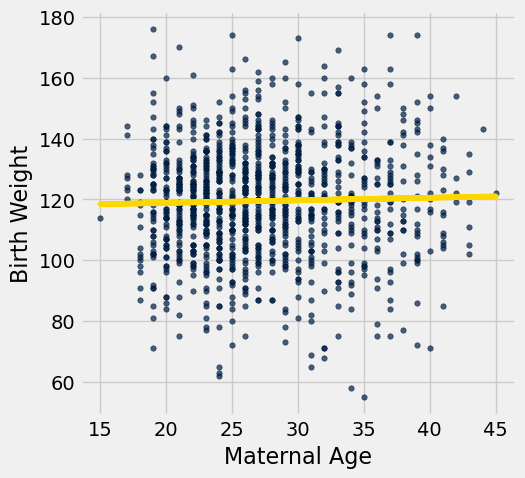

In [149]:
scatter_fit(baby, 'Maternal Age', 'Birth Weight')

# Use bootstrap_slope to estimate the slope of the true line.

Slope of regression line: 0.0850076694158
Approximate 95%-confidence interval for the true slope:
-0.105567116283 0.268120189203


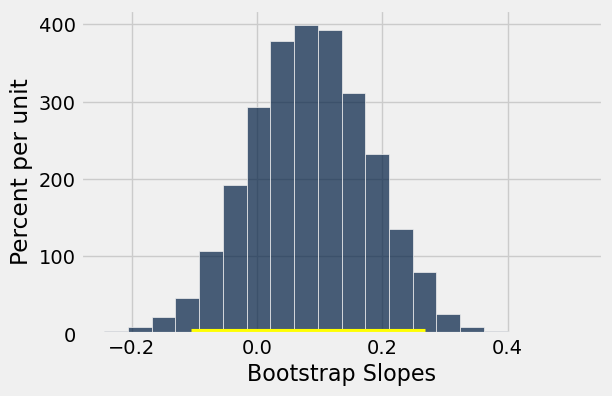

In [150]:
bootstrap_slope(baby, 'Maternal Age', 'Birth Weight', 5000)

# Analysis
Since the confidence interval contains 0 we cannot reject the null hypothesis that the slope of the true linear relation between maternal age and baby's birth weight is 0.

# Prediction Intervals
Regression lines are used to make predictions for a new individual who was not part of our original sample but is similar to the sampled individuals.

In [151]:
def fitted_value(table, x, y, given_x):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * given_x  + b

In [153]:
fit_300 = fitted_value(baby, 'Gestational Days', 'Birth Weight', 300)
fit_300

129.2129241703143

# The Variability of the Prediction
Since different samples will provide different slopes we must look at a range of values or confidence interval for the prediction.

In [159]:
# Bootstrap prediction of variable y at new_x
# Data contained in table; prediction by regression of y based on x
# repetitions = number of bootstrap replications of the original scatter plot

def bootstrap_prediction(table, x, y, new_x, repetitions):
    
    # For each repetition:
    # Bootstrap the scatter; 
    # get the regression prediction at new_x; 
    # augment the predictions list
    predictions = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = table.sample()
        bootstrap_prediction = fitted_value(bootstrap_sample, x, y, new_x)
        predictions = np.append(predictions, bootstrap_prediction)
        
    # Find the ends of the approximate 95% prediction interval
    left = percentile(2.5, predictions)
    right = percentile(97.5, predictions)
    
    # Prediction based on original sample
    original = fitted_value(table, x, y, new_x)
    
    # Display results
    Table().with_column('Prediction', predictions).hist(bins=20)
    plots.xlabel('predictions at x='+str(new_x))
    plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Height of regression line at x='+str(new_x)+':', original)
    print('Approximate 95%-confidence interval:')
    print(left, right)
    print("length of the confidence interval", right - left)

# Effect of Changing the Value of the Predictor


Height of regression line at x=285: 122.214571016
Approximate 95%-confidence interval:
121.174083103 123.30838589
length of the confidence interval 2.13430278653


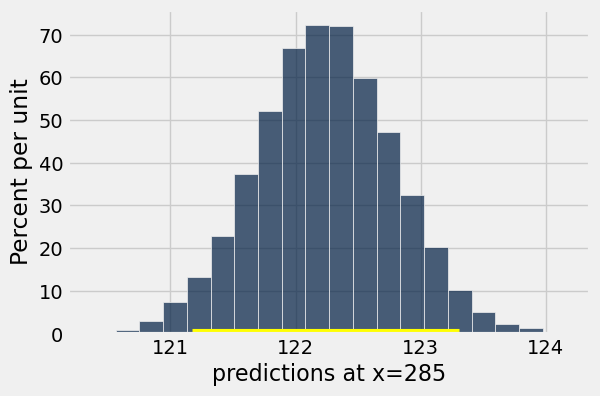

In [160]:
bootstrap_prediction(baby, 'Gestational Days', 'Birth Weight', 285, 5000)

In [157]:
np.mean(baby.column('Gestational Days'))

279.10136286201021

Since 285 is closer to the mean than 300 the regression lines based on the bootstrap samples are closer to each other near the center of distribution of the predicted variable.  Given 300-279 = 21, what is the 95% Confidence Interval for the predicted value when x = 279-21 = 258? 

Height of regression line at x=258: 109.617535338
Approximate 95%-confidence interval:
107.393933 111.704778477


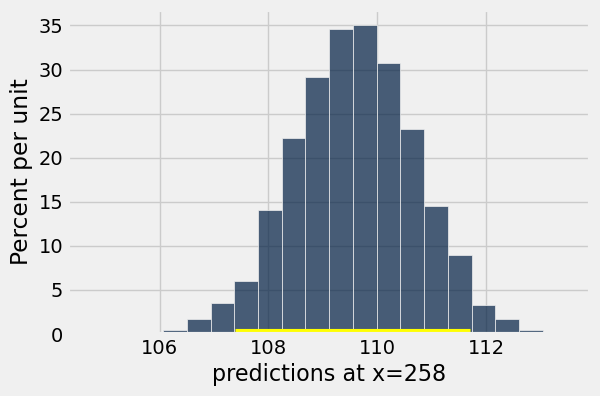

In [158]:
bootstrap_prediction(baby, 'Gestational Days', 'Birth Weight', 258, 5000)

# Words of caution
All of the predictions and tests that we have performed in this chapter assume that the regression model holds.  If the regression model does not 